# Capital strategic data Analysis
---
import and review the data:

In [765]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from datetime import date,datetime,timedelta 

In [766]:
#read the excel file from public drive
data= pd.read_csv("https://raw.githubusercontent.com/MarinaNezhelsky/datasets/main/student%20interview%20pre%20work.csv")
data=data.sort_values('Tool type')
# read the excel file from local drive
#data=pd.read_excel("C:/Users/marin/student interview pre work- data.xlsx")
data

,Tool type,Tool name,tool source,need date,cost [Thousands],Wafer production volume per week
0,ACB,ACB175,new buy,22/10/2020,755,1110
80,ACB,ACB177,new buy,20/04/2021,755,1110
45,ACB,ACB179,new buy,20/01/2021,755,1110
104,ACB,ACB180,new buy,19/06/2021,755,1110
14,ACB,ACB176,new buy,21/11/2020,755,1110
...,...,...,...,...,...,...
30,TVD,TVD126,reuse,21/11/2020,73,830
59,TVD,TVD122,reuse,20/01/2021,73,830
79,TVD,TVD118,reuse,21/03/2021,73,830
29,TVD,TVD123,reuse,21/11/2020,73,830


In [767]:
data.dtypes

Tool type                           object
Tool name                           object
tool source                         object
need date                           object
cost [Thousands]                     int64
Wafer production volume per week     int64
dtype: object

---
### a. weekly cost
>I assume that the 'need date' column represents the date the tool was purchased. (because in the assignment it is explained about 'install date' and not about 'need date')     Therefore, I calculate the weekly cost for the tools according to the date they were purchased.  
>In the following table you can see the costs each week

In [771]:
data['need date'] = pd.to_datetime(data['need date'])
month_dt=data.groupby('need date')[['cost [Thousands]']].sum().reset_index()
month_dt['Week']=month_dt['need date'].dt.isocalendar().week
date_range = pd.date_range(start='2020-10-22', end='2021-07-14', freq='W')
week_dt = pd.DataFrame({
    'Year': date_range.year,
    'Week': date_range.week,
    'Date': date_range})
merged_table = pd.merge(week_dt, month_dt,left_on='Week', right_on='Week', how='left')
merged_table.fillna(0, inplace=True)
merged_table

<ipython-input-771-d221fddca2a2>:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  'Week': date_range.week,


,Year,Week,Date,need date,cost [Thousands]
0,2020,43,2020-10-25,2020-10-22 00:00:00,3755.0
1,2020,44,2020-11-01,0,0.0
2,2020,45,2020-11-08,0,0.0
3,2020,46,2020-11-15,0,0.0
4,2020,47,2020-11-22,2020-11-21 00:00:00,3816.0
5,2020,48,2020-11-29,0,0.0
6,2020,49,2020-12-06,0,0.0
7,2020,50,2020-12-13,0,0.0
8,2020,51,2020-12-20,0,0.0
9,2020,52,2020-12-27,2020-12-21 00:00:00,2341.0


---
### b. update the file: pushout the need date by 30 days (only when need date> 2021) 

In [773]:
data['need date'] = pd.to_datetime(data['need date'])
month_data=data.loc[data['need date'].dt.year >= 2021].reset_index()
month_data.to_excel("C:/Users/marin/student interview pre work- data.xlsx", index=False)
month_data.sort_values(by='need date')

,index,Tool type,Tool name,tool source,need date,cost [Thousands],Wafer production volume per week
58,54,EWS,EWS193,reuse,2021-01-20,229,568
40,51,DFR,DFR115,reuse,2021-01-20,103,377
39,52,DFR,DFR116,reuse,2021-01-20,103,377
52,53,DXE,DXE116,new buy,2021-01-20,742,328
28,48,BCR,BCR152,new buy,2021-01-20,654,341
...,...,...,...,...,...,...,...
19,119,AYB,AYB222,reuse,2021-07-14,136,278
67,127,RWQ,RWQ292,reuse,2021-07-14,70,393
66,126,RWQ,RWQ290,new buy,2021-07-14,234,393
15,120,AYB,AYB224,reuse,2021-07-14,136,278


In [774]:
month_data['need date'].unique()

array(['2021-04-20T00:00:00.000000000', '2021-01-20T00:00:00.000000000',
       '2021-06-19T00:00:00.000000000', '2021-02-19T00:00:00.000000000',
       '2021-05-20T00:00:00.000000000', '2021-03-21T00:00:00.000000000',
       '2021-07-14T00:00:00.000000000'], dtype='datetime64[ns]')

---
### c. update the file: for each need date- sort the tools by their cost 
we will sort the data from the previous section (when need date> 2021) 

In [775]:
#sortring function
def sort_tools_by_cost(group):
    group_sorted = group.sort_values(by='cost [Thousands]')
    return group_sorted

sorted_cost = month_data.groupby('need date').apply(sort_tools_by_cost)
# update the exist excel file in the local drive
sorted_cost.to_excel("C:/Users/marin/student interview pre work- data.xlsx", index=False)
sorted_cost

index Tool type Tool name tool source  need date  \
need date                                                         
2021-01-20 64     55       RWQ    RWQ130       reuse 2021-01-20   
           86     59       TVD    TVD122       reuse 2021-01-20   
           39     52       DFR    DFR116       reuse 2021-01-20   
           40     51       DFR    DFR115       reuse 2021-01-20   
           76     58       TEW    TEW121       reuse 2021-01-20   
...              ...       ...       ...         ...        ...   
2021-07-14 71    129       TEW    TEW222     new buy 2021-07-14   
           72    130       TEW    TEW224     new buy 2021-07-14   
           74    131       TEW    TEW225     new buy 2021-07-14   
           83    132       TEW    TEW226     new buy 2021-07-14   
           49    124       DXE    DXE212     new buy 2021-07-14   

               cost [Thousands]  Wafer production volume per week  
need date                                                          
2021-01-20 64                70                               393  
           86                73                               830  
           39               103                               377  
           40               103                               377  
           76               127                               188  
...                         ...                               ...  
2021-07-14 71               423                               188  
           72               423                               188  
           74               423                               188  
           83               423                               188  
           49               742                               328  

[88 rows x 7 columns]

---
### Expenses by month in 2021

[Text(0, 0, '2021-01-20'),
 Text(1, 0, '2021-02-19'),
 Text(2, 0, '2021-03-21'),
 Text(3, 0, '2021-04-20'),
 Text(4, 0, '2021-05-20'),
 Text(5, 0, '2021-06-19'),
 Text(6, 0, '2021-07-14')]

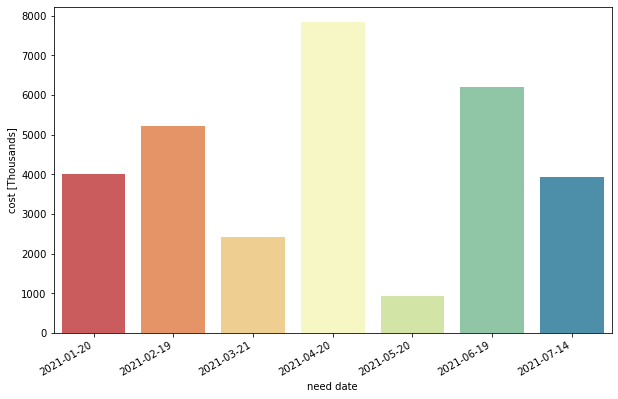

In [776]:
cost_by_month=month_data.groupby('need date')[['cost [Thousands]']].sum().reset_index()
cost_by_month
figure = plt.figure(figsize=(10,6))
ax=sns.barplot(x=cost_by_month['need date'].dt.date,y="cost [Thousands]", data=cost_by_month,palette='Spectral' )
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")


---
###  weekly amount of wafers that the factory can produce
we will find the weekly amount of wafers that the factory can produce.
since Intel can buy new tools or upgrade old tools- we will find the cheapest price for each tool.

In [777]:
type_count=data.groupby(['Tool type']).agg({'cost [Thousands]': ['min'],'Tool name':['count']}).reset_index()
type_count.columns = ['tool type','minimum cost','tool amount']
type_count['total wafer production (cumulative)']=data['Wafer production volume per week'].unique()
type_count['wafer per tool']=type_count['total wafer production (cumulative)']/type_count['tool amount']
type_count

,tool type,minimum cost,tool amount,total wafer production (cumulative),wafer per tool
0,ACB,755,5,1110,222.000000
1,ASC,26,14,346,24.714286
2,AYB,136,15,278,18.533333
3,BAS,226,5,1044,208.800000
4,BCR,196,14,341,24.357143
5,DFR,103,12,377,31.416667
6,DXE,223,15,328,21.866667
7,EWS,229,8,568,71.000000
8,RWQ,70,14,393,28.071429
9,TED,70,2,2690,1345.000000


Text(0.5, 1.0, 'the amount by tool type')

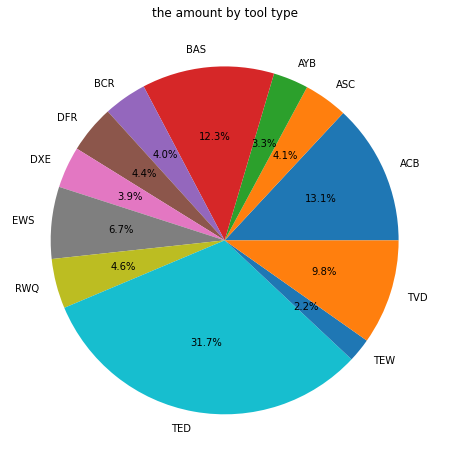

In [778]:
plt.figure(figsize=(8,8))  #figure size
plt.pie(type_count['total wafer production (cumulative)'], labels=type_count['tool type'],autopct='%1.1f%%')
plt.title('the amount by tool type')

In [779]:
max_wafers=min(type_count['total wafer production (cumulative)'])
print("Beacuse each wafer must be processed through all 12 tool types, the maximum amount of wafers that factory can produce in a week is:",max_wafers)
min_idx = type_count['total wafer production (cumulative)'].idxmin()
min_type = type_count.loc[min_idx, 'tool type']
print("The tool type that limits weekly production is:", min_type)

Beacuse each wafer must be processed through all 12 tool types, the maximum amount of wafers that factory can produce in a week is: 188
The tool type that limits weekly production is: TEW


---
### Expenses by tools 
We will check how much was spent on each type of tool in the months in which they were purchased.
Here we will use the original data.

In [780]:
data['Tool type'].unique()

array(['ACB', 'ASC', 'AYB', 'BAS', 'BCR', 'DFR', 'DXE', 'EWS', 'RWQ',
       'TED', 'TEW', 'TVD'], dtype=object)

Text(0.5, 1.0, '"DXE" tool per month')

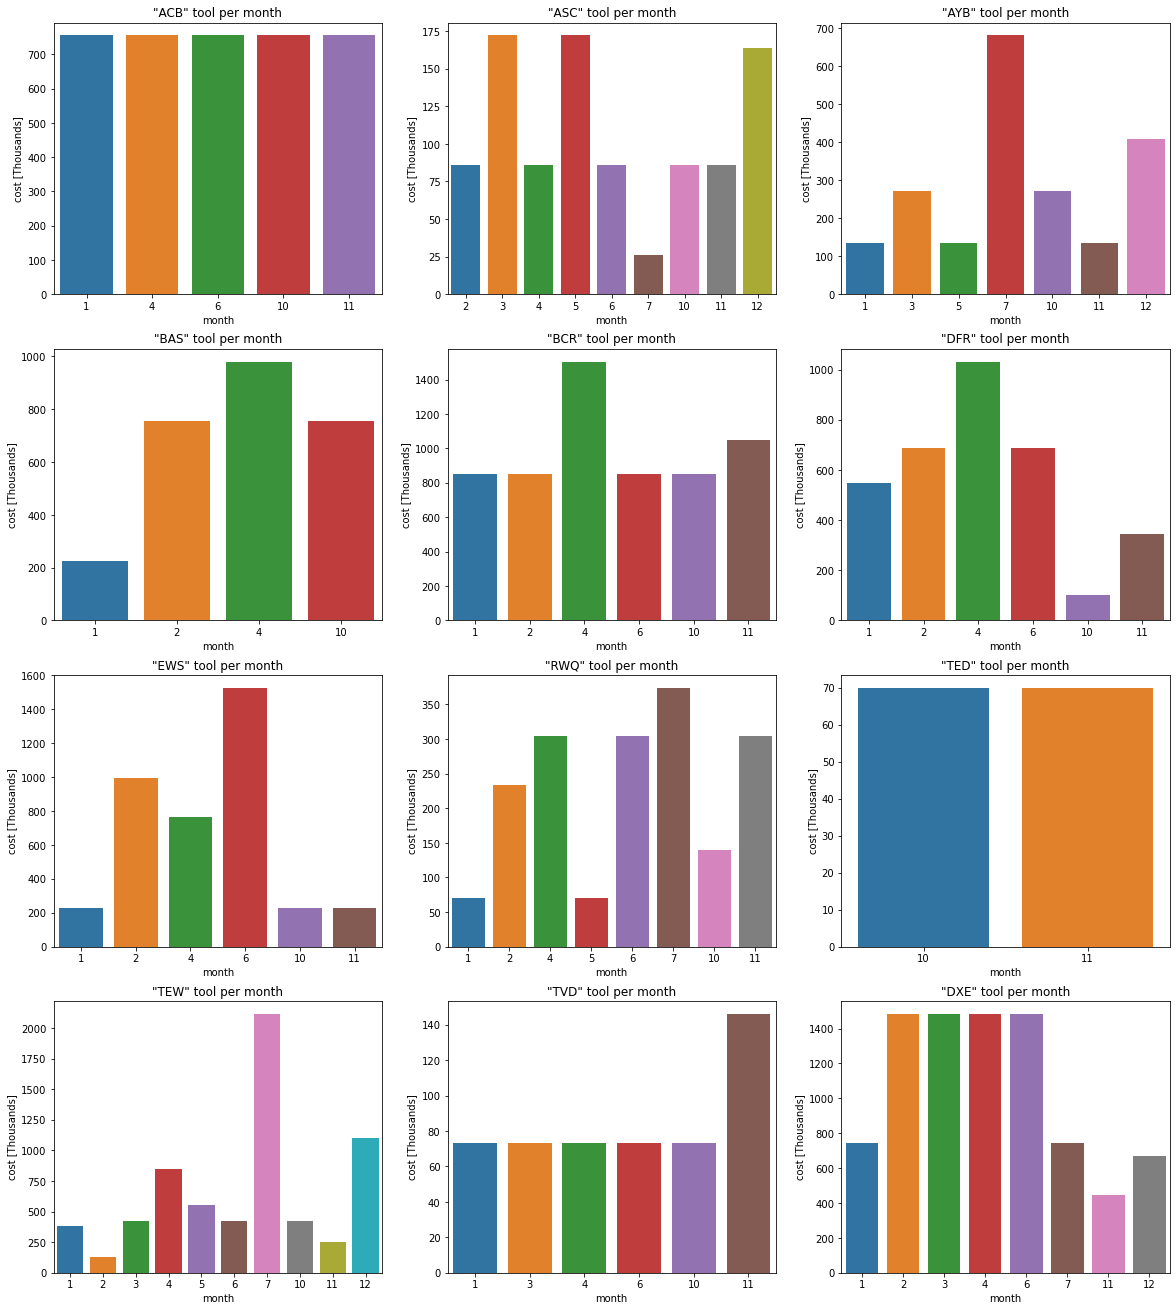

In [781]:
tool_df=data.groupby(['need date','Tool type'])[['cost [Thousands]']].sum().reset_index()
tool_df['need date'] = pd.to_datetime(tool_df['need date'])
tool_df['month'] = tool_df['need date'].dt.month
fig, axes = plt.subplots(4,3,figsize=(20, 23))
sns.barplot(x='month',y="cost [Thousands]", data=tool_df[tool_df['Tool type']=='ACB'],ax = axes[0,0] )
axes[0, 0].set_title('"ACB" tool per month')
sns.barplot(x='month',y="cost [Thousands]", data=tool_df[tool_df['Tool type']=='ASC'],ax = axes[0,1] )
axes[0, 1].set_title('"ASC" tool per month')
sns.barplot(x='month',y="cost [Thousands]", data=tool_df[tool_df['Tool type']=='AYB'],ax = axes[0,2] )
axes[0, 2].set_title('"AYB" tool per month')
sns.barplot(x='month',y="cost [Thousands]", data=tool_df[tool_df['Tool type']=='BAS'],ax = axes[1,0] )
axes[1, 0].set_title('"BAS" tool per month')
sns.barplot(x='month',y="cost [Thousands]", data=tool_df[tool_df['Tool type']=='BCR'],ax = axes[1,1] )
axes[1, 1].set_title('"BCR" tool per month')
sns.barplot(x='month',y="cost [Thousands]", data=tool_df[tool_df['Tool type']=='DFR'],ax = axes[1,2] )
axes[1, 2].set_title('"DFR" tool per month')
sns.barplot(x='month',y="cost [Thousands]", data=tool_df[tool_df['Tool type']=='EWS'],ax = axes[2,0] )
axes[2, 0].set_title('"EWS" tool per month')
sns.barplot(x='month',y="cost [Thousands]", data=tool_df[tool_df['Tool type']=='RWQ'],ax = axes[2,1] )
axes[2, 1].set_title('"RWQ" tool per month')
sns.barplot(x='month',y="cost [Thousands]", data=tool_df[tool_df['Tool type']=='TED'],ax = axes[2,2] )
axes[2, 2].set_title('"TED" tool per month')
sns.barplot(x='month',y="cost [Thousands]", data=tool_df[tool_df['Tool type']=='TEW'],ax = axes[3,0] )
axes[3, 0].set_title('"TEW" tool per month')
sns.barplot(x='month',y="cost [Thousands]", data=tool_df[tool_df['Tool type']=='TVD'],ax = axes[3,1] )
axes[3, 1].set_title('"TVD" tool per month')
sns.barplot(x='month',y="cost [Thousands]", data=tool_df[tool_df['Tool type']=='DXE'],ax = axes[3,2] )
axes[3, 2].set_title('"DXE" tool per month')


---